In [1]:
# Standard libraries
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.gallegosalas.data_fc_db_sessional import DataFCDatabase
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.signals import zscore

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yasirdata2/'

In [3]:
dataDB = DataFCDatabase(params)

Reading channel label file
Reading allen brain map
Reading task structure
Searching for data files


In [4]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read Neuro Data:', max=42)

In [5]:
dataDB.baseline_normalization()

In [6]:
print('mice', dataDB.mice)
print('nSessions', len(dataDB.sessions))
print('datatypes', dataDB.get_data_types())
print('nChannel', dataDB.dataNeuronal[0].shape[1])

mice {'m9'}
nSessions 21
datatypes ['raw', 'dff_trial', 'dff_yasir', 'dff_session']
nChannel 180


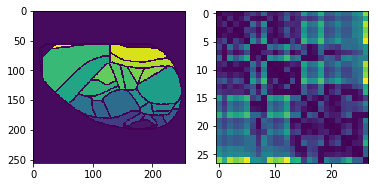

29

In [7]:
dataDB.calc_shortest_distances()

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(dataDB.allenMap)
ax[1].imshow(dataDB.allenDist)
plt.show()

len(dataDB.allenCounts)

In [8]:
dataDB.channelLabels

array(['A1', 'S2', 'TEA', 'AD', 'AP', 'PR', 'NO', 'BC', 'MO', 'LI', 'AL',
       'PL', 'RL', 'V1', 'M1', 'UN', 'FL', 'M2', 'A', 'TR', 'AM', 'PM',
       'RA', 'RD', 'BC', 'BC', 'BC', 'ACC'], dtype=object)

/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


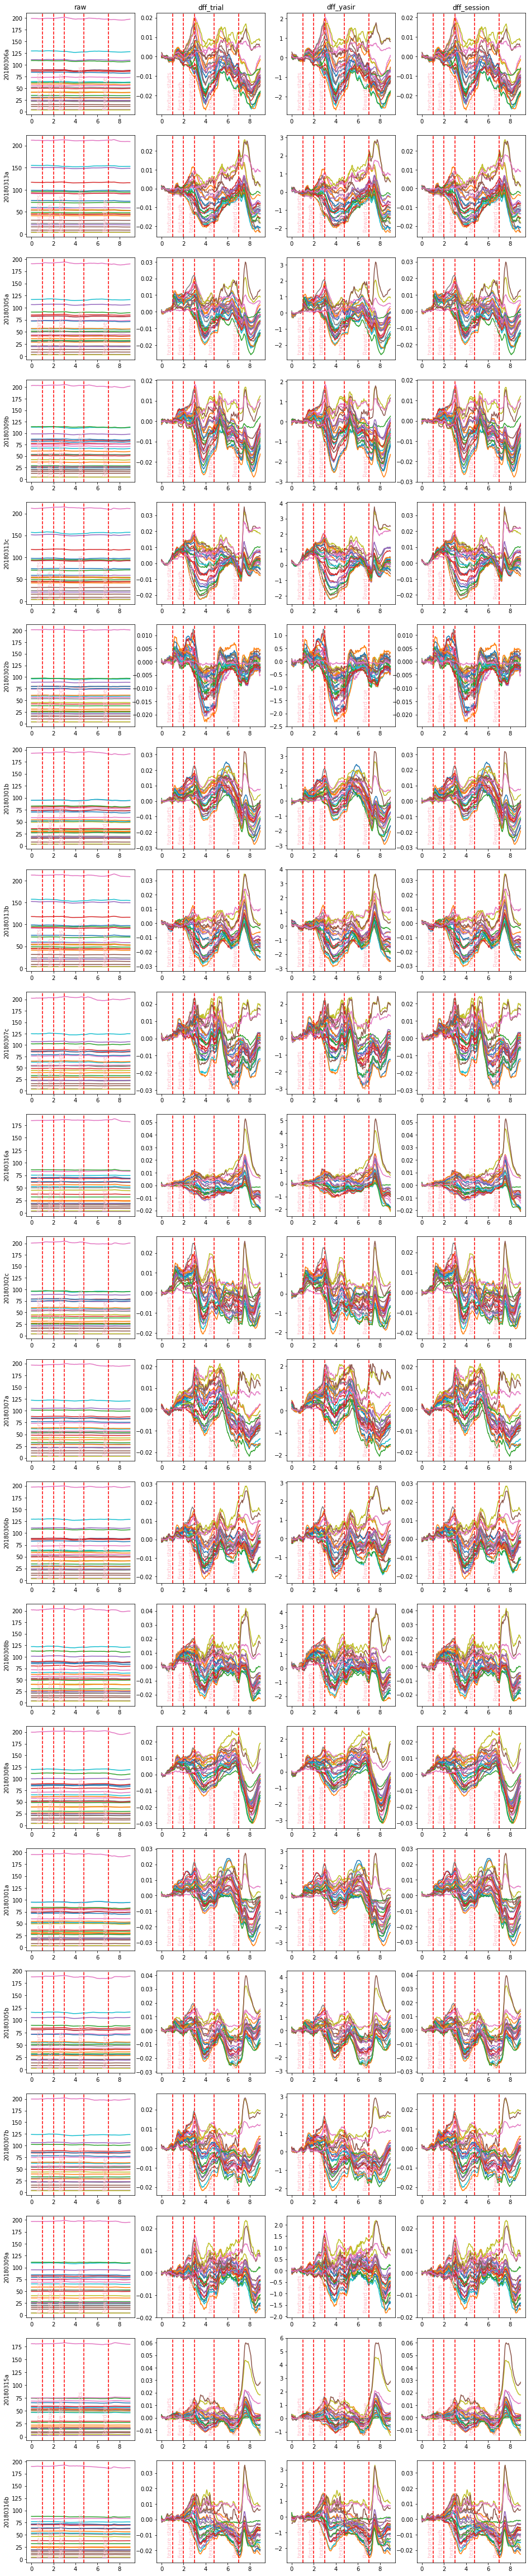

In [9]:
nRows = len(dataDB.sessions)
nCols = dataDB.get_n_data_types()

for iMouse, mousename in enumerate(dataDB.mice):
    fig, ax = plt.subplots(nrows=nRows, ncols=nCols, figsize=(4*nCols, 4*nRows), tight_layout=True)
#     fig.suptitle(mousename)
    
    for iSession, session in enumerate(dataDB.sessions):
        ax[iSession, 0].set_ylabel(session)
        
        for iDataType, datatype in enumerate(dataDB.get_data_types()):
            if iSession == 0:
                ax[0, iDataType].set_title(datatype)
                
            mouseRows = dataDB.get_rows('neuro', {'mousename' : mousename, 'session' : session, 'datatype' : datatype})
        
            for idx, row in mouseRows.iterrows():
                data = np.copy(dataDB.dataNeuronal[idx])
                nTrial, nTime, nChannel = data.shape
                times = dataDB.get_times(nTime)

                ax[iSession, iDataType].plot(times, np.mean(data, axis=0))
                dataDB.label_plot_timestamps(ax[iSession, iDataType], linecolor='r', textcolor='pink')
        
plt.show()

In [10]:
idxTrial = dataDB.get_rows('neuro', {'session' : '20180301a', 'datatype' : 'dff_trial'}).index[0]
idxSession = dataDB.get_rows('neuro', {'session' : '20180301a', 'datatype' : 'dff_session'}).index[0]

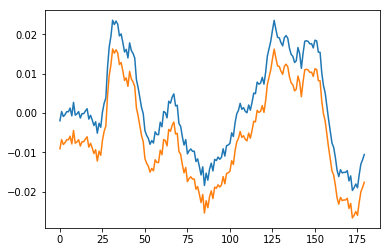

In [11]:
dataTrial = dataDB.dataNeuronal[idxTrial]
dataSession = dataDB.dataNeuronal[idxSession]

plt.figure()
plt.plot(dataTrial[0, :, 2])
plt.plot(dataSession[0, :, 2])
plt.show()